In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [ ]:
from Bio.PDB import *

class ExtractResidues(Select):

    def __init__(self, ResidueIndexGroup, resList):
        super(ExtractResidues, self).__init__()
        self.ResidueIndexGroup = ResidueIndexGroup
        self.resList = resList

    def accept_residue(self, residue):
        if self.resList.index(residue) in self.ResidueIndexGroup:
            return True
        else:
            return False

def extractResidues(structure, toName, ResidueIndexGroup):
    resList = list(structure.get_residues())
    io = PDBIO()
    io.set_structure(structure)
    io.save(toName, ExtractResidues(ResidueIndexGroup, resList))

In [312]:
def getFrame(frame, outLocation, movieLocation="movie.pdb"):
    location = movieLocation
    with open(location) as f:
        a = f.readlines()
    n = len(a)
    # get the position of every model title
    model_title_index_list = []
    for i in range(n):
        if len(a[i]) >= 5 and a[i][:5] == "MODEL":
            model_title_index = i
            model_title_index_list.append(model_title_index)
    model_title_index_list.append(n)
    check_array = np.diff(model_title_index_list)
    if not np.allclose(check_array, check_array[0]):
        print("!!!! Someting is wrong  !!!!")
        print(check_array)
    else:
        size = check_array[0]
    with open(outLocation, "w") as out:
        out.write("".join(a[size*frame:size*(frame+1)]))

        
def get_best_frame_and_extract(pdb, run, step, Q="Q_wat"):
    outLocation = f"/Users/weilu/Research/server/jun_2019/simluation_hybrid/sixth_with_er/{Q}_max/{pdb}_best.pdb"
    frame = step - 2
    movieLocation = f'/Users/weilu/Research/server/jun_2019/simluation_hybrid/sixth_with_er/{pdb}/{run}/movie.pdb'
    getFrame(frame, outLocation, movieLocation)
    probFile= f"/Users/weilu/Research/server/jun_2019/simluation_hybrid/TM_pred/{pdb}_PureTM/{pdb}.prob"
    GlobularPart, MembranePart = get_two_part_from_prediction(probFile)
    if pdb == "2xov_complete":
        GlobularPart = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]

    fileLocation = outLocation.split(".")[0]
    parser = PDBParser()
    structure = parser.get_structure('X', outLocation)
    extractResidues(structure, f"{fileLocation}_globular.pdb", GlobularPart)
    extractResidues(structure, f"{fileLocation}_membrane.pdb", MembranePart)


In [3]:
pdb_list =['4a2n', '3kp9', '5xpd', '2xov_complete', '5d91', '6e67A']
# pdb_list = ["2xov_complete", "6e67A", "5xpd", "3kp9", "4a2n", "5d91", "2jo1"]

In [238]:
length_info.drop("index", axis=1)

,Protein,Length
0,2jo1,72
1,4a2n,192
2,3kp9,259
3,5xpd,269
4,2xov_complete,276
5,5d91,335
6,6e67A,457


In [4]:
length_info = pd.read_csv("/Users/weilu/Research/server/jun_2019/simluation_hybrid/length_info.csv", index_col=0)
length_info = length_info.sort_values("Length").reset_index()
pdb_list_sorted_by_length = list(length_info.Protein.unique())
length_info_sorted_by_length = list(length_info.Length.unique())
label_list = []
for p, n in zip(pdb_list_sorted_by_length, length_info_sorted_by_length):
    label_list.append(p+f"\n{n}")

In [266]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "sixth_with_er"
all_data = []
for pdb in pdb_list:
    for i in range(2):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}/info.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}_er.csv")


6e67A 1 0
2jo1 0 0
2jo1 1 0


In [268]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_sixth_with_er_07-02_er.csv"
er_2 = pd.read_csv(fileLocation, index_col=0).reset_index(drop=True)


In [242]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_fifth_with_er_07-01_er.csv"
er = pd.read_csv(fileLocation, index_col=0).reset_index(drop=True)


In [281]:
combined = pd.concat([single.assign(Scheme="single"), ha.assign(Scheme="frag(HA)")
#                       , er.assign(Scheme="ER-frag")
                     , er_2.assign(Scheme="ER-Frag")], sort=False)

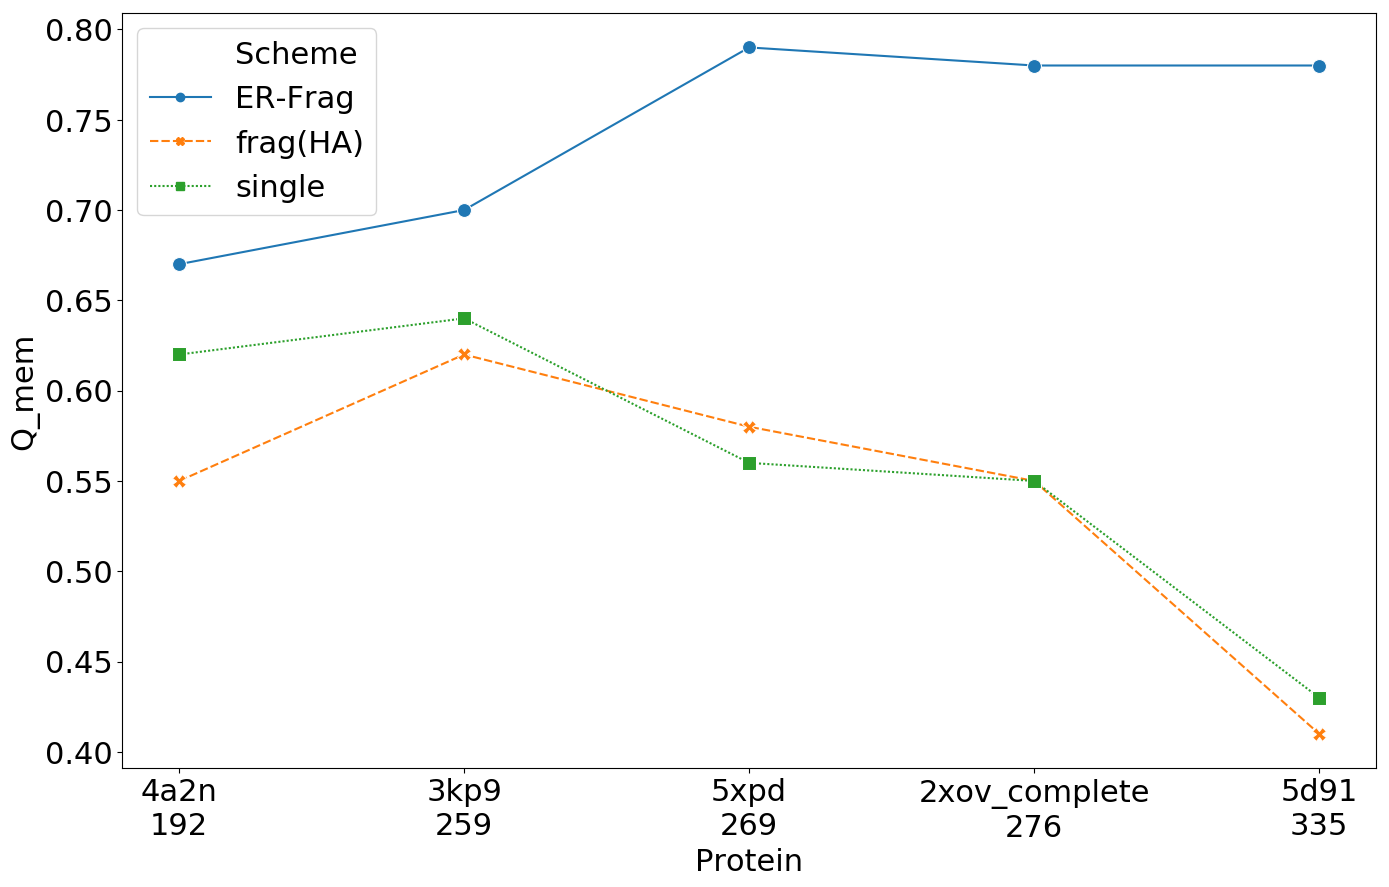

In [311]:
y = "Q_mem"
d = combined.query("Steps > 200").reset_index(drop=True)

# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()
d = d.query("Protein != '2jo1'").reset_index(drop=True)
sub_pdb_list =['4a2n', '3kp9', '5xpd', '2xov_complete', '5d91']
# pdb_list =
sub_label_list = []
for p, n in zip(pdb_list_sorted_by_length, length_info_sorted_by_length):
    if p in sub_pdb_list:
        sub_label_list.append(p+f"\n{n}")
        
d.Protein = pd.Categorical(d.Protein, 
                      categories=sub_pdb_list)
t = d.groupby(["Protein", "Scheme"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y=y, hue="Scheme", style="Scheme", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')



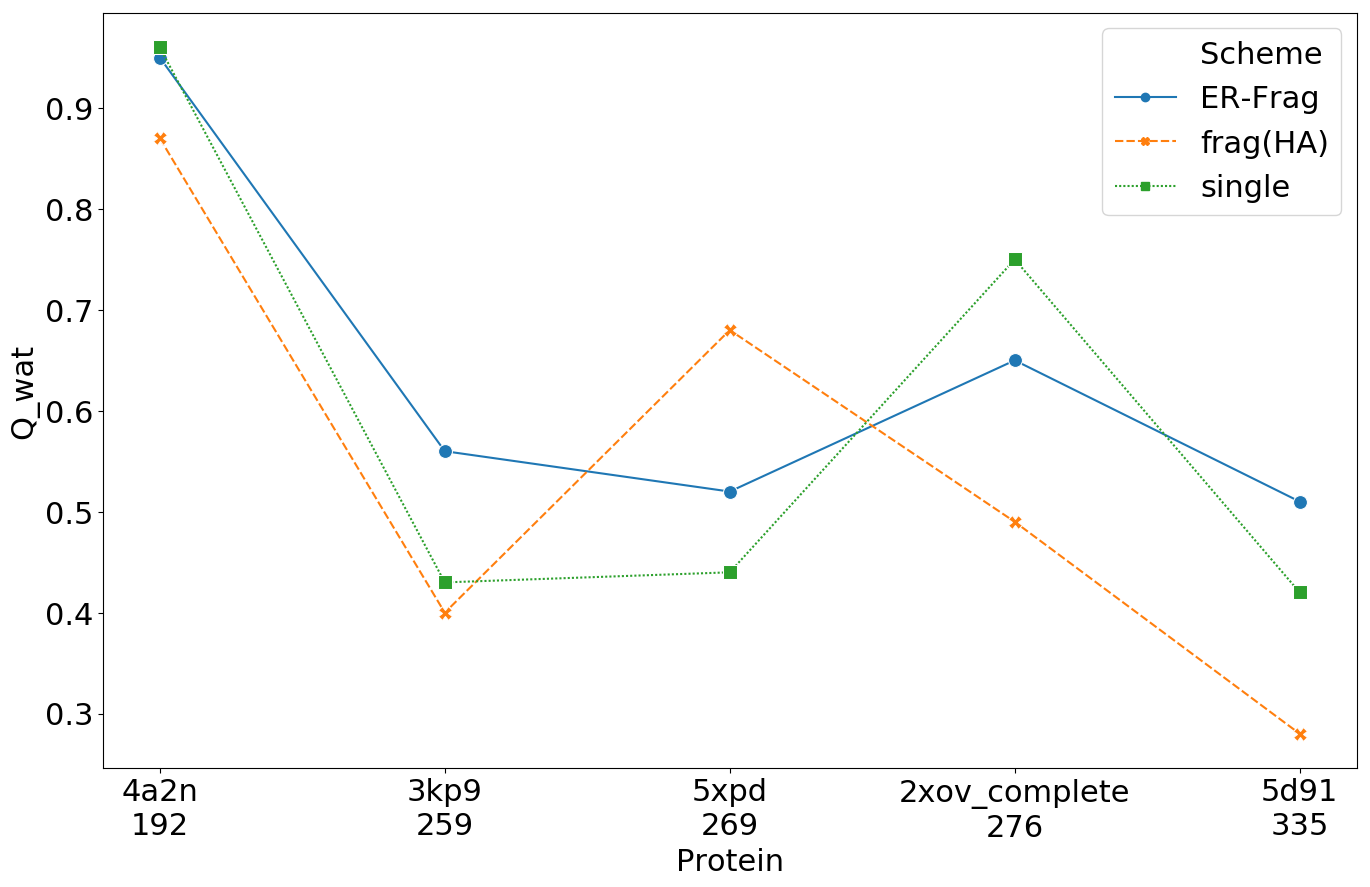

In [284]:
y = "Q_wat"
d = combined.query("Steps > 200").reset_index(drop=True)

# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()
d = d.query("Protein != '2jo1'").reset_index(drop=True)
sub_pdb_list =['4a2n', '3kp9', '5xpd', '2xov_complete', '5d91']
# pdb_list =
sub_label_list = []
for p, n in zip(pdb_list_sorted_by_length, length_info_sorted_by_length):
    if p in sub_pdb_list:
        sub_label_list.append(p+f"\n{n}")
        
d.Protein = pd.Categorical(d.Protein, 
                      categories=sub_pdb_list)
t = d.groupby(["Protein", "Scheme"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y=y, hue="Scheme", style="Scheme", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')



In [286]:
max_Q_data.query("Scheme == 'ER-Frag'")

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,Excluded,Rama,Contact,Helical,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Scheme,ER
0,204,0.38,0.56,0.95,0.54,19.02,0.0,601.00,357.10,109.27,45.39,-906.29,-236.07,-80.16,-693.52,-434.05,-0.10,-0.00,13.59,-1766.71,0,4a2n,0,ER-Frag,-542.87
3,245,0.31,0.45,0.56,0.68,28.90,0.0,752.16,504.92,139.16,55.12,-1186.30,-341.01,-103.20,-1113.93,-469.42,-25.00,-14.69,11.01,-2639.87,0,3kp9,0,ER-Frag,-848.70
6,486,0.40,0.59,0.52,0.76,23.11,0.0,553.16,409.70,120.86,59.78,-1606.65,-359.40,-157.95,-1173.91,-633.37,-22.88,-7.38,16.21,-3987.03,0,5xpd,0,ER-Frag,-1185.21
9,232,0.32,0.49,0.65,0.71,32.84,0.0,791.39,563.45,145.64,62.34,-1109.21,-339.87,-104.98,-1169.36,-509.69,-21.66,-12.98,16.31,-2934.56,1,2xov_complete,0,ER-Frag,-1245.95
12,444,0.35,0.55,0.51,0.68,26.42,0.0,756.83,525.84,130.64,69.06,-1937.75,-484.32,-154.77,-1577.79,-488.36,-51.15,-20.91,20.63,-4426.46,0,5d91,0,ER-Frag,-1214.39


In [302]:
d = max_Q_data.query("Scheme == 'ER-Frag'")
for i, line in d.iterrows():
    run = line["Run"]
    pdb = line["Protein"]
    step = line["Steps"]
    print(pdb, run, step)
    get_best_frame_and_extract(pdb, run, step)

In [316]:
d = max_Q_data.query("Scheme == 'ER-Frag'")
for i, line in d.iterrows():
    run = line["Run"]
    pdb = line["Protein"]
    step = line["Steps"]
    print(pdb, run, step)
    get_best_frame_and_extract(pdb, run, step, Q="Q_mem")

4a2n 0 231
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] , 
[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64] , 
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92] , 
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159] , 
Globular 92 130
size 192
 Globular 159 192
3kp9 0 462
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] , 
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] , 
[83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102] , 
[109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129] , 
[138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155] , 
size 259
 Globular 155 259
5xpd 0 285
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2

In [314]:
max_Q_data.query("Scheme == 'ER-Frag'")

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,Excluded,Rama,Contact,Helical,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Scheme,ER
0,231,0.48,0.69,0.79,0.67,18.48,0.0,628.78,387.50,118.15,44.93,-928.62,-242.70,-79.33,-688.87,-435.01,-1.14,-0.00,16.80,-1758.72,0,4a2n,0,ER-Frag,-579.21
3,462,0.33,0.49,0.46,0.70,26.07,0.0,571.73,391.87,97.26,62.37,-1305.72,-367.74,-110.62,-1159.41,-475.96,-46.59,-12.58,12.29,-3208.14,0,3kp9,0,ER-Frag,-865.04
6,285,0.43,0.59,0.40,0.79,22.31,0.0,748.41,540.84,122.86,63.62,-1591.76,-349.13,-156.64,-1168.47,-642.02,-24.47,-4.76,14.15,-3636.28,0,5xpd,0,ER-Frag,-1188.91
9,407,0.39,0.58,0.49,0.78,30.29,0.0,684.69,480.58,124.82,61.74,-1261.85,-374.84,-123.66,-1185.01,-497.02,-13.26,-16.61,17.71,-3364.84,0,2xov_complete,0,ER-Frag,-1262.12
12,231,0.29,0.45,0.21,0.78,26.11,0.0,982.15,622.24,185.93,103.13,-1802.82,-448.55,-144.58,-1522.05,-500.53,-11.37,-4.52,27.04,-3662.01,0,5d91,0,ER-Frag,-1148.08


In [265]:
max_Q_data

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,Excluded,Rama,Contact,Helical,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Scheme,ER
0,214,0.44,0.62,0.92,0.59,18.96,0.0,306.95,237.63,73.21,29.24,-1110.31,-260.55,-108.38,-746.00,-439.55,-17.44,-0.00,13.28,-2612.78,0,4a2n,0,ER-frag,-590.86
1,227,0.29,0.48,0.87,0.52,19.42,0.0,320.84,196.01,60.42,24.11,-1112.79,-286.75,-98.70,-754.15,-451.17,-48.44,-8.26,8.82,-2150.08,4,4a2n,0,frag(HA),NaN
2,206,0.34,0.52,0.96,0.55,18.27,0.0,337.19,229.50,77.95,37.66,-1112.50,-311.21,-106.30,-664.35,-437.16,-0.91,-130.87,10.65,-2070.35,2,4a2n,0,single,NaN
3,234,0.34,0.53,0.54,0.63,24.13,0.0,424.38,251.36,76.94,40.30,-1327.19,-411.79,-121.50,-1200.14,-470.27,-46.74,-13.04,10.15,-3679.63,0,3kp9,0,ER-frag,-892.10
4,205,0.25,0.40,0.40,0.58,24.64,0.0,436.53,294.70,85.08,39.15,-1366.51,-414.36,-133.78,-1212.52,-482.62,-67.88,-30.64,5.98,-2846.88,4,3kp9,0,frag(HA),NaN
5,236,0.32,0.49,0.43,0.60,23.56,0.0,411.36,296.72,77.98,49.56,-1380.56,-476.89,-115.48,-833.57,-483.09,-73.64,-201.86,6.67,-2722.80,0,3kp9,0,single,NaN
6,203,0.30,0.48,0.66,0.65,31.29,0.0,470.85,313.90,91.88,41.02,-1301.91,-401.11,-124.78,-1225.22,-521.60,-49.92,-12.88,13.37,-3818.78,1,2xov_complete,0,ER-frag,-1112.39
7,216,0.22,0.37,0.49,0.46,33.76,0.0,455.54,275.36,83.83,41.99,-1382.89,-420.30,-136.40,-1258.28,-537.27,-29.90,-10.34,9.53,-2909.14,0,2xov_complete,0,frag(HA),NaN
8,217,0.27,0.45,0.75,0.50,31.80,0.0,489.19,313.38,94.38,55.71,-1342.67,-497.95,-126.99,-882.63,-532.75,-65.12,-207.10,11.24,-2691.31,2,2xov_complete,0,single,NaN
9,212,0.29,0.45,0.29,0.68,24.17,0.0,584.25,385.11,111.29,66.71,-2075.43,-524.57,-178.50,-1606.17,-482.09,-86.76,-28.25,21.94,-5033.92,0,5d91,0,ER-frag,-1221.46


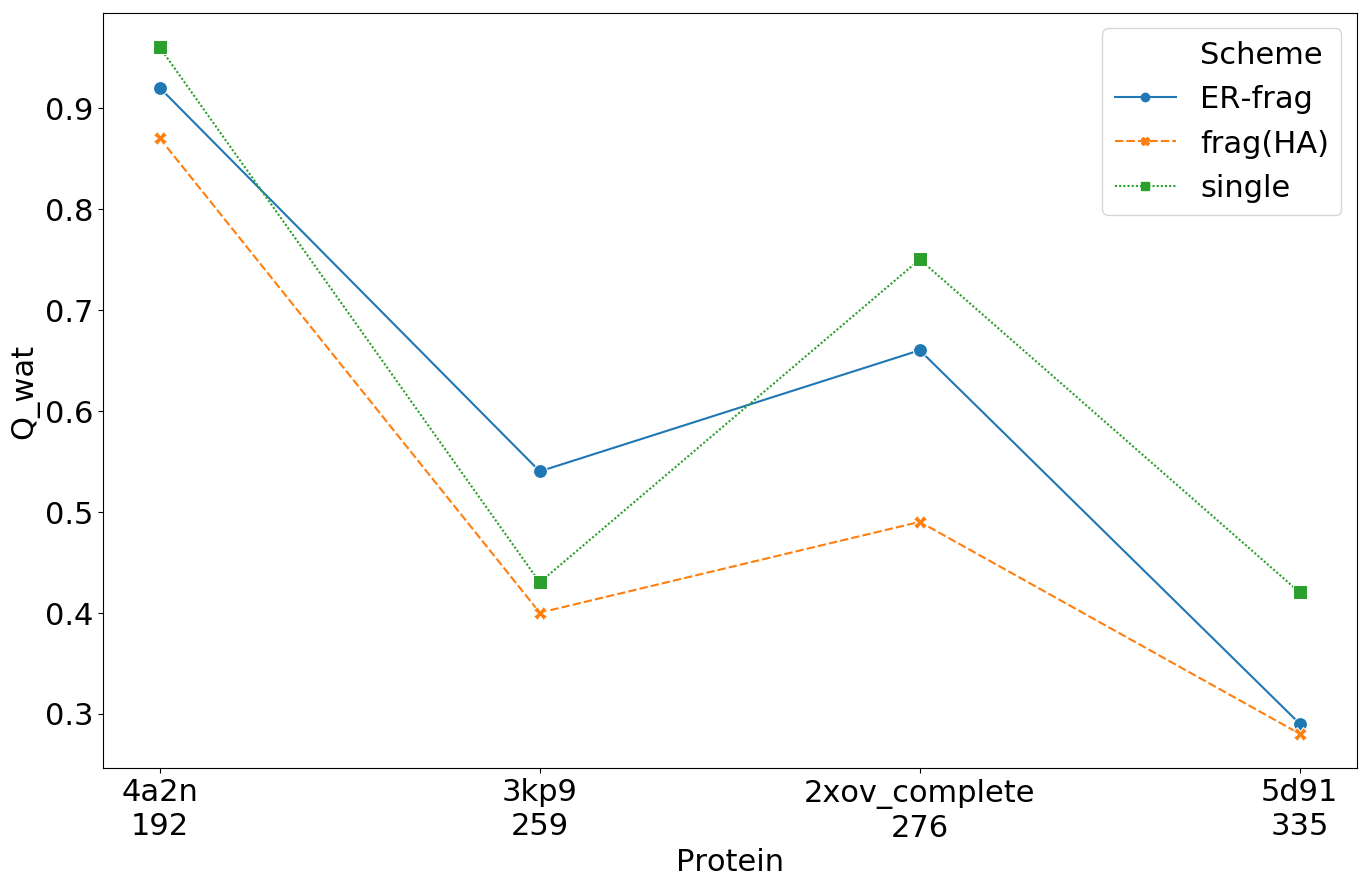

In [264]:
y = "Q_wat"
d = combined.query("Steps > 200").reset_index(drop=True)

# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()
d = d.query("Protein != '2jo1'").query("Protein != '5xpd'").query("Protein != '6e67A'").reset_index(drop=True)
sub_pdb_list =['4a2n', '3kp9', '2xov_complete', '5d91']
d.Protein = pd.Categorical(d.Protein, 
                      categories=sub_pdb_list)
t = d.groupby(["Protein", "Scheme"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y=y, hue="Scheme", style="Scheme", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')



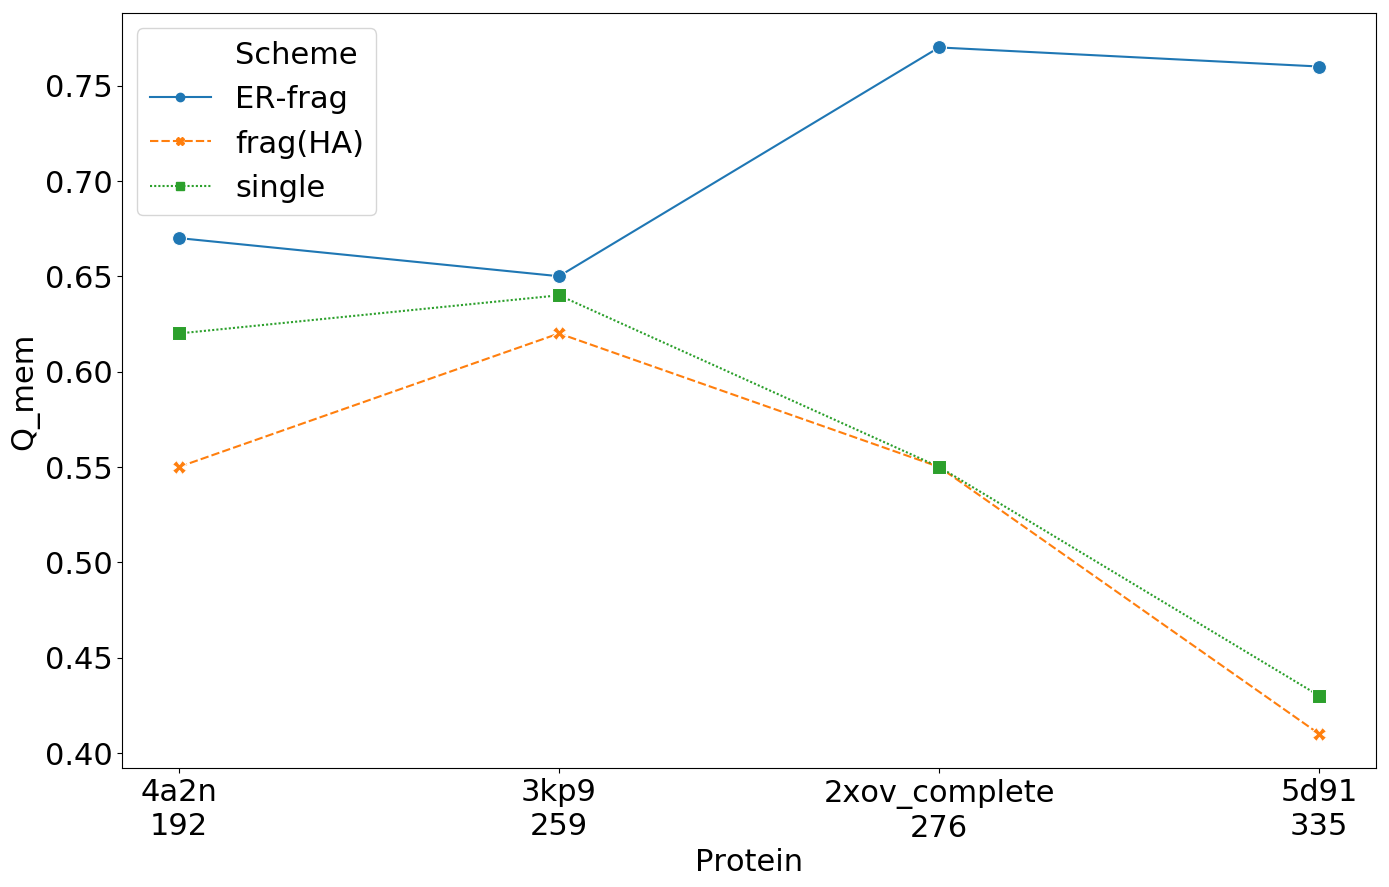

In [262]:
y = "Q_mem"
d = combined.query("Steps > 200").reset_index(drop=True)

# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()
d = d.query("Protein != '2jo1'").query("Protein != '5xpd'").query("Protein != '6e67A'").reset_index(drop=True)
sub_pdb_list =['4a2n', '3kp9', '2xov_complete', '5d91']
d.Protein = pd.Categorical(d.Protein, 
                      categories=sub_pdb_list)
t = d.groupby(["Protein", "Scheme"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y=y, hue="Scheme", style="Scheme", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')



In [7]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "fourth"
all_data = []
for pdb in pdb_list:
    for i in range(5):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}/info.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}_ha.csv")


In [8]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_fourth_07-01_ha.csv"
ha = pd.read_csv(fileLocation, index_col=0)


In [9]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_second_small_batch_06-29.csv"
single = pd.read_csv(fileLocation, index_col=0)



In [17]:
combined = pd.concat([single.assign(Frag="single"), ha.assign(Frag="frag(HA)")])

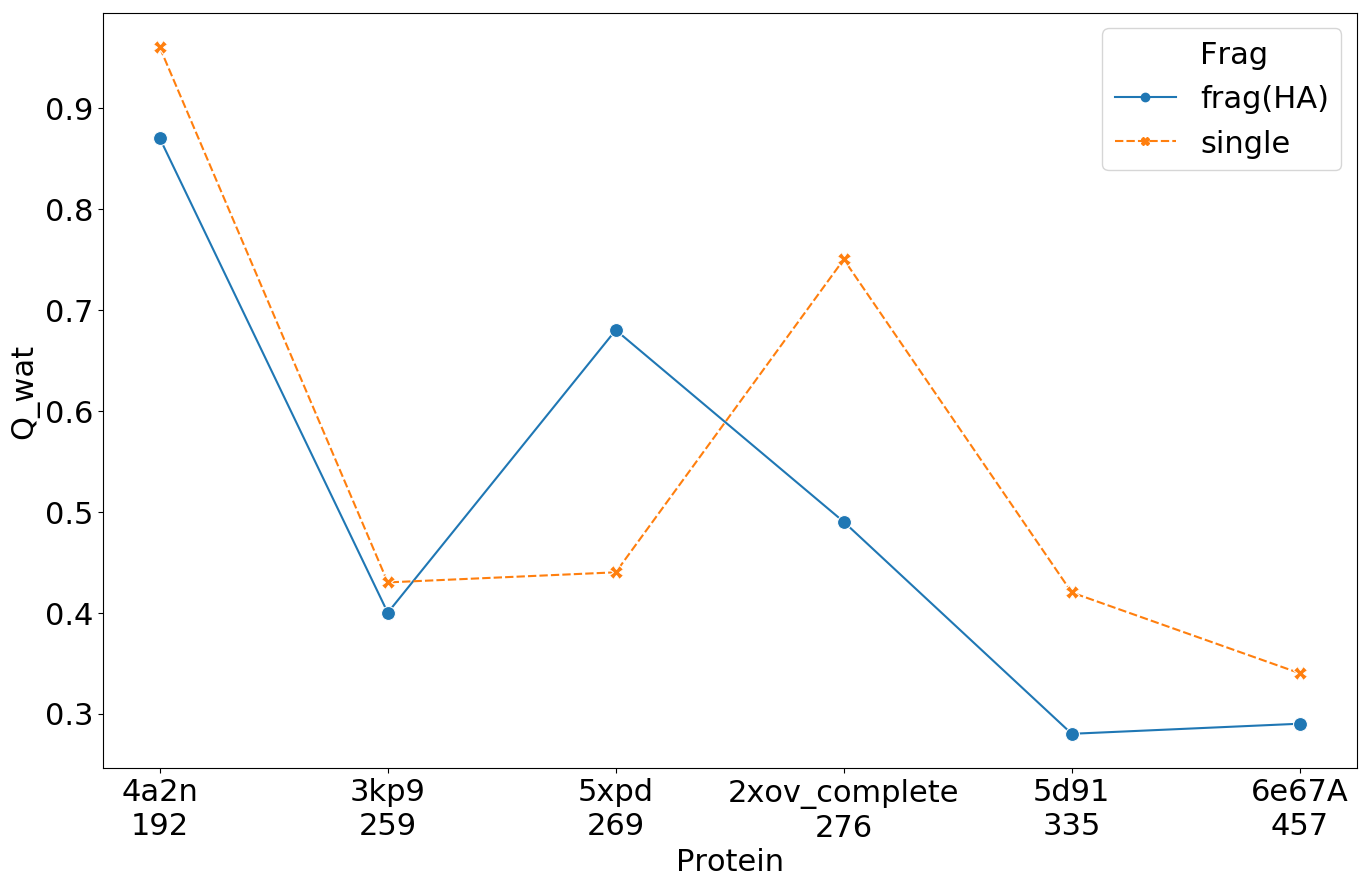

In [23]:
d = combined.query("Steps > 200").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list)
# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()

t = d.groupby(["Protein", "Frag"])["Q_wat"].idxmax().reset_index()
max_Q_data = d.iloc[t["Q_wat"].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y="Q_wat", hue="Frag", style="Frag", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list[1:], rotation=0, ha='center')



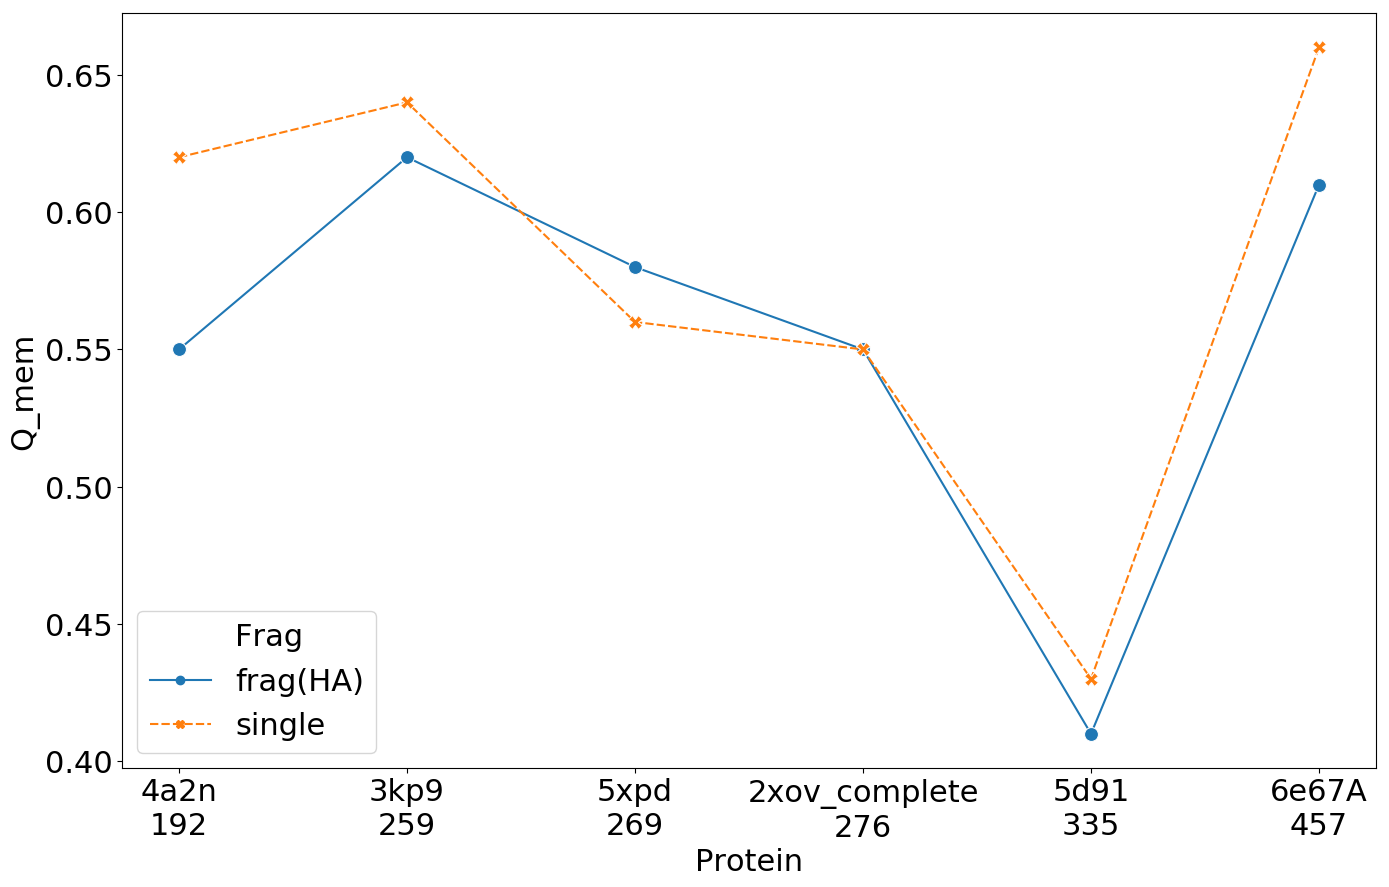

In [24]:
y = "Q_mem"
d = combined.query("Steps > 200").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list)
# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()

t = d.groupby(["Protein", "Frag"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y=y, hue="Frag", style="Frag", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list[1:], rotation=0, ha='center')



In [ ]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "fifth_with_er"
all_data = []
for pdb in pdb_list:
    for i in range(2):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}/info.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}_er.csv")


In [ ]:
plt.rcParams.update({'font.size': 12})
native_energy = combined.query("Steps < 1 and Run == 0").reset_index(drop=True)
y_show = "Fragment"
g = sns.FacetGrid(combined.query("Steps > 100"), col="Protein",col_wrap=2,  hue="Frag", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Q_wat", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    try:
        energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[1]
        ax.axhline(energy, ls="--", color="orange", linewidth=4)
    except:
        pass

In [25]:
pdb_list = ["2xov_complete", "6e67A", "5xpd", "3kp9", "4a2n", "5d91", "2jo1"]

In [223]:
pre = "/Users/weilu/Research/server/jun_2019/simluation_hybrid"
for pdb in pdb_list:
    location = f"{pre}/setup/{pdb}/{pdb}.pdb"
    table = get_inside_or_not_table(location)
    probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
    predict_table = get_inside_or_not_table_from_TM_pred(probFile)
    cm = confusion_matrix(table, predict_table)
    print(f"{pdb:^20s}", "{:^10s}".format("pred_0"), "{:^10s}".format("pred_1"))
    print("{:^20s}".format("true_0"), f"{cm[0][0]:^10d}", f"{cm[0][1]:^10d}")
    print("{:^20s}".format("true_1"), f"{cm[1][0]:^10d}", f"{cm[1][1]:^10d}")
    print("")

   2xov_complete       pred_0     pred_1  
       true_0           128         1     
       true_1            40        107    

       6e67A           pred_0     pred_1  
       true_0           292         7     
       true_1            18        140    

        5xpd           pred_0     pred_1  
       true_0           114         10    
       true_1            18        127    

        3kp9           pred_0     pred_1  
       true_0           147         2     
       true_1            17         93    

        4a2n           pred_0     pred_1  
       true_0            80         3     
       true_1            25         84    

        5d91           pred_0     pred_1  
       true_0           183         30    
       true_1            31         91    

        2jo1           pred_0     pred_1  
       true_0            51         1     
       true_1            2          18    



In [31]:
def get_inside_or_not_table_from_TM_pred(probFile):
    with open(f"{probFile}") as f:
            a = f.readlines()
    res_list = []
    for i, line in enumerate(a[3:]):
        prob = float(line.strip().split()[3])
        res = 0 if prob < 0.5 else 1
        res_list.append(res)
    return res_list

In [224]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [170]:
from sklearn.metrics import confusion_matrix

In [172]:
cm = confusion_matrix(table, predict_table)

In [183]:
t = pd.DataFrame(cm, columns=["pred_0", "pred_1"], index=["true_0", "true_1"])

In [221]:
print(f"{pdb:^20s}", "{:^10s}".format("pred_0"), "{:^10s}".format("pred_1"))
print("{:^20s}".format("true_0"), f"{cm[0][0]:^10d}", f"{cm[0][1]:^10d}")
print("{:^20s}".format("true_1"), f"{cm[1][0]:^10d}", f"{cm[1][1]:^10d}")

   2xov_complete       pred_0     pred_1  
       true_0           128         1     
       true_1            40        107    


In [227]:
pdb = pdb_list[0]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


2xov_complete


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [232]:
pdb = pdb_list[1]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


6e67A


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410


In [233]:
pdb = pdb_list[2]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


5xpd


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
pdb = pdb_list[3]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


3kp9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [235]:
pdb = pdb_list[4]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


4a2n


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
pdb = pdb_list[5]
print(pdb)
location = f"{pre}/setup/{pdb}/{pdb}.pdb"
table = get_inside_or_not_table(location)
probFile = f"{pre}/TM_pred/{pdb}_PureTM/{pdb}.prob"
predict_table = get_inside_or_not_table_from_TM_pred(probFile)
d = pd.DataFrame([table, predict_table])
bigdf = d

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
a = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
a


5d91


In [146]:

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '10px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
# import imgkit
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
bigdf = d
styled_table = bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '0pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())
with open ('/Users/weilu/Desktop/out.html','w') as out:
    html = styled_table.render()
    out.write(html)

In [165]:
for i in table:
    print(i, end="")
print("")
for i in predict_table:
    print(i, end="")

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111111111111111111111010011011111000001111111111111111111111111111111111100001111111111111111111110000011111111111111111100000000001111111111111111111111111111111111111111111000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111000000000000000000000000011111111111111111111111000000000111111111111111100000000011111111111111111000000000011111111111111111110000000000111111111111111000000000

In [162]:
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [104]:
d.columns = [""] * 72

In [102]:
s.hide_columns([0,1])

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
pd.get_option("display.max_rows")

60

In [77]:
pd.get_option("display.max_columns")

2

In [49]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 1 else 'black'
    return 'color: %s' % color

In [37]:
print().values)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [39]:
print(table)
print(predict_table)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [335]:
pdb = "4rws"
pre = "/Users/weilu/Research/server/jul_2019/hybrid_simulation
loc = f"{pre}/TM_pred/{pdb}_topo"
with open(loc) as f:
    a = f.readlines()
assert len(a) % 3 == 0
chain_count = len(a) // 3
seq = ""
for i in range(chain_count):
    seq_i = (a[i*3+2]).strip()
    seq += seq_i
assert np.alltrue([i in ["0", "1"] for i in seq])
with open(f"{pre}/TM_pred/{pdb}_predicted_zim", "w") as out:
    for i in seq:
        if i == "0":
            out.write("1\n")
        elif i == "1":
            out.write("2\n")
        else:
            raise
    

In [339]:
force_setup_file = f"{pre}/energy_forces/forces_setup_{pdb}.py"
res_list = []
first = None
count = 1
previousEnd = 0
# print("g_all = [")
zimOut = open(f"{pre}/{pdb}_predicted_zim", "w")
out = "[\n"
for i, res in enumerate(seq):
    o = "2" if res == "1" else "1"
    zimOut.write(o+"\n")
    if res == "0":
        if len(res_list) > 0:
            # print(f"g{count} =", res_list)
            print(res_list, ", ")
            out += f"    {res_list},\n"
            count += 1
            last = res_list[-1]
            first = res_list[0] if first is None else first
            span = res_list[0] - previousEnd
            if span > 30:
                print(f"{pdb} Globular", previousEnd, res_list[0])
                globular = list(range(previousEnd+10, res_list[0]-10))
            previousEnd = last
        res_list = []
    if res == "1":
        res_list.append(i)
n = len(seq)
print(f"{pdb}: size {n}")
span = n - previousEnd
if span > 30:
    print(f"{pdb} Globular", previousEnd, n)
    globular = list(range(previousEnd+10, n-10))

out += "]\n"
zimOut.close()
do(f"cp {pre}/TM_pred/{pdb}_predicted_zim {pred}/setup/{pdb}/PredictedZim")

membranePart = []
for i in range(first-5, last+5):
    if i not in globular:
        membranePart.append(i)
# print("]")
# replace(, "GALL", out)
# , backup='.bak'
# print(out, first, last, membranePart, globular)
with fileinput.FileInput(force_setup_file, inplace=True) as file:
    for line in file:
        tmp = line.replace("GALL", out).replace("FIRST", str(first)).replace("LAST", str(last))
        tmp = tmp.replace("RESMEMB", f"{membranePart}")
        tmp = tmp.replace("RESGLOBULAR", f"{globular}")
        print(tmp, end='')

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41] , 
[53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73] , 
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109] , 
[127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145] , 
[170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196] , 
[214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237] , 
[257, 258, 259, 260, 261, 262, 263, 264, 265, 266] , 
4rws: size 346
4rws Globular 266 346


In [ ]:
def get_inside_or_not_table(pdb_file):
    parser = PDBParser(PERMISSIVE=1,QUIET=True)
    try:
        structure = parser.get_structure('X', pdb_file)
    except:
        return [0]
    inside_or_not_table = []
    for res in structure.get_residues():
        if res.get_id()[0] != " ":
            continue  # skip
        try:
            res["CA"].get_vector()
        except:
            print(pdb_file, res.get_id())
            return [0]
        inside_or_not_table.append(int(abs(res["CA"].get_vector()[-1]) < 15))
    return inside_or_not_table

In [ ]:
parser = PDBParser(QUIET=1)
structure = parser.get_structure('X', pdb)